In [139]:
from titanic import helper as hp
pd.set_option('display.expand_frame_repr', False) # display full data in terminal

df = pd.read_csv('/kaggle/titanic/eda/imputed_train.csv')
X_heatmap = df.drop(['Cabin', 'PassengerId', 'Age_Imputed', 'Name', 'Ticket', 'Sex_male', 'Embarked_Q'], axis=1) # for showing correlation matrix below
X = X_heatmap.drop(['Survived'], axis=1)
y = df['Survived']

rand_state = 64

X_train, X_val, y_train, y_val = skl.model_selection.train_test_split(X, y, random_state=rand_state)
X.head(2)


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_S
0,3,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,1.0,0.0


<Axes: >

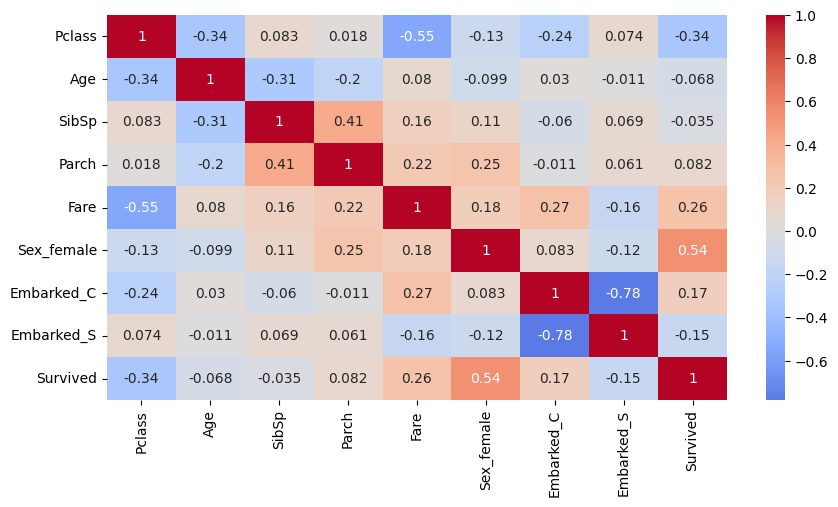

In [140]:
plt.figure(figsize=(10,5))
sns.heatmap(X_heatmap.corr(), annot=True, cmap='coolwarm', center=0)

# highest correlation is between Parch and SibSp, which makes sense. for now I'll ignore this.perhaps using Lasso Regulariaztion might coerce many of the coefficients to be 0.

The above Heatmap shows a linear correlations between all the predictors (and the response, just to get an initial impression).

* Sex has the biggest impact on survival.
* Pclass is next biggest (inversley, meaning 1st class  - lowest number, correlates to highest survival rate).
* Fare is also moderately correlated, but Fare and Class are highly correlated (obviously), so we may want to drop one of those predictors... but which one... Pclass has a higher correlation, but Fare is more granular (since Pclass only has 3 values.) 
* Embarked is a little bit correlated, but perhaps not much. Maybe location of embarcation determined where on the ship you were located, which in turn affected survival rate, but the data is not very granular, and we have so little Cabin info.
* Age is surprisingly not highly corelated

0.45404457181663316


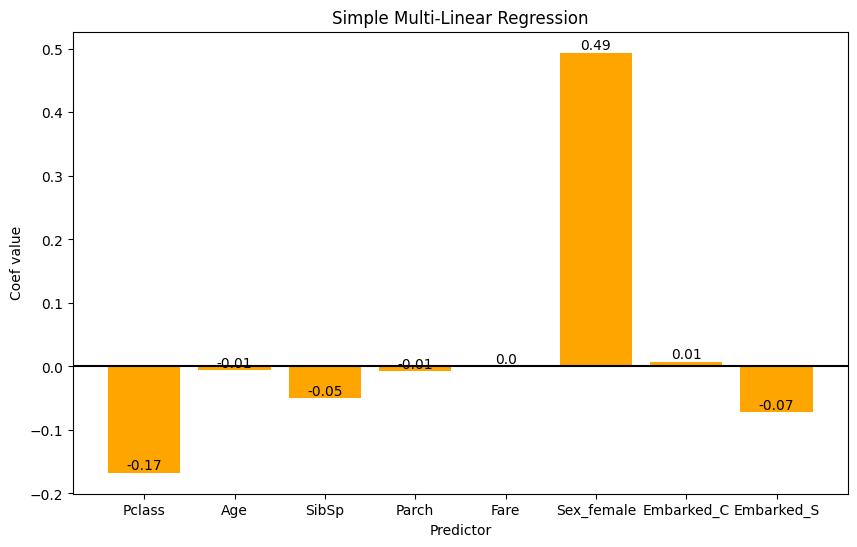

In [141]:
# first lets fit a multi linear regression using all predictors (except name, ticket, cabin, ID, age_imputed)
multi_linear_model = LinearRegression()

multi_linear_model.fit(X_train, y_train)

print(multi_linear_model.score(X_val, y_val))

# plot coefficients for each predictor:
plt.figure(figsize=(10,6))
bars = plt.bar(X.columns, multi_linear_model.coef_, color="orange")
plt.ylabel("Coef value")
plt.xlabel("Predictor")
plt.title("Simple Multi-Linear Regression")
plt.axhline(color='k')

hp.show_values_on_bar(bars)


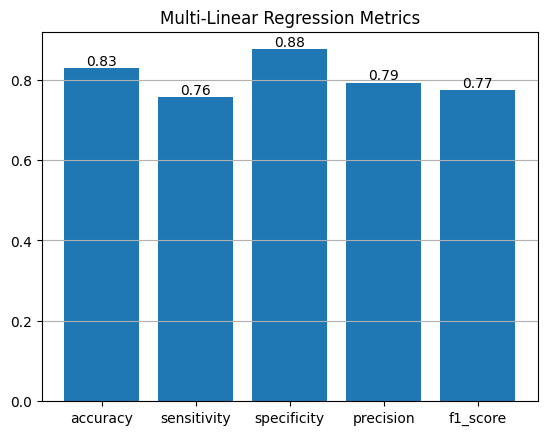

In [142]:
multi_linear_predictions = [round(x) for x in multi_linear_model.predict(X_val)]
metrics = hp.compute_confusion_matrix_metrics(y_val, multi_linear_predictions)

bars = plt.bar(metrics.keys(), metrics.values())
plt.grid(axis='y')
plt.title("Multi-Linear Regression Metrics")
hp.show_values_on_bar(bars)